ung cấp bộ dữ liệu Cholesterol dataset_2190_cholesterol.csv trong folder đề thi (thông tin chi tiết và dữ liệu cũng có thể download trên https://www.openml.org/d/204 ) với 14 features và bảng kết quả run (https://www.openml.org/t/2295 ) đo bằng MAE đã được thực hiện để tham khảo.
### Yêu cầu:
Hãy chọn thuật toán phù hợp để xây dựng model dự đoán chol (chỉ số choleserol). Giải thích lý do tại sao bạn chọn thuật toán này?
Chú ý: Thực hiện tất cả các bước để giải quyết vấn đề này từ tiền xử lý dữ liệu => báo cáo kết quả

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('../../Data/dataset_2190_cholesterol.csv')
df.shape

(303, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalach   303 non-null    int64  
 7   exang     303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slope     303 non-null    int64  
 10  ca        303 non-null    object 
 11  thal      303 non-null    object 
 12  num       303 non-null    int64  
 13  chol      303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
# Drop invalid rows
df.drop(df[df['thal'].str.isnumeric()==False].index, inplace=True)
df.drop(df[df['ca'].str.isnumeric()==False].index, inplace=True)

df.shape

(297, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,num,chol
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128,247.350168
std,9.049736,0.468500,0.964859,17.762806,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551,51.997583
min,29.000000,0.000000,1.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,126.000000
25%,48.000000,0.000000,3.000000,120.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,211.000000
50%,56.000000,1.000000,3.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,243.000000
75%,61.000000,1.000000,4.000000,140.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000,276.000000
max,77.000000,1.000000,4.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,564.000000


In [6]:
df.head()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
0,63,1,1,145,1,2,150,0,2.3,3,0,6,0,233
1,67,1,4,160,0,2,108,1,1.5,2,3,3,2,286
2,67,1,4,120,0,2,129,1,2.6,2,2,7,1,229
3,37,1,3,130,0,0,187,0,3.5,3,0,3,0,250
4,41,0,2,130,0,2,172,0,1.4,1,0,3,0,204


In [7]:
df.tail()

,age,sex,cp,trestbps,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,chol
297,57,0,4,140,0,0,123,1,0.2,2,0,7,1,241
298,45,1,1,110,0,0,132,0,1.2,2,0,7,1,264
299,68,1,4,144,1,0,141,0,3.4,2,2,7,2,193
300,57,1,4,130,0,0,115,1,1.2,2,1,7,3,131
301,57,0,2,130,0,2,174,0,0.0,2,1,3,1,236


# LỰA CHỌN THUỘC TÍNH

In [8]:
X = df[['age', 'sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']]
y = df['chol']

In [9]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [10]:
# Aplly SelectKBest class to extract all best features
best_features = SelectKBest(score_func=f_regression, k='all')
fit = best_features.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [11]:
# Concat 2 dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs', 'Score'] # Naming the dataframe columns
# Sorting in descending order
featureScores.sort_values("Score", ascending=False, inplace=True)
print(featureScores)

       Specs      Score
0        age  12.632757
1        sex  12.048355
5    restecg   8.260885
3   trestbps   5.193847
10        ca   4.019767
2         cp   1.541042
12       num   1.308307
7      exang   1.042398
8    oldpeak   0.440098
4        fbs   0.047650
11      thal   0.034790
9      slope   0.025054
6    thalach   0.000002


In [12]:
corrmat=df.corr()
top_corr_features = corrmat.index

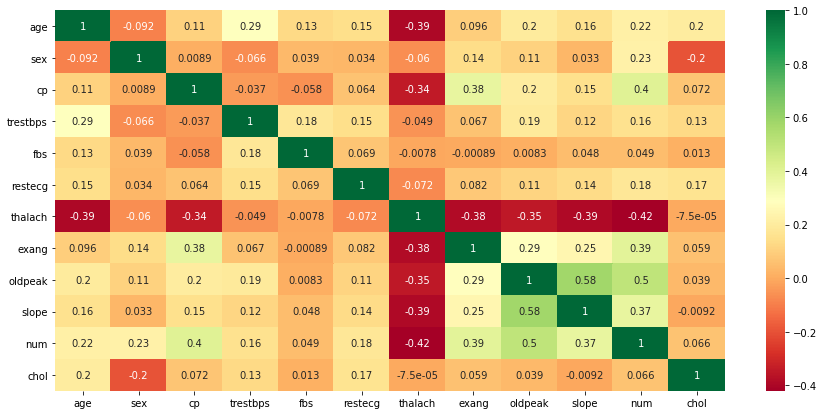

In [13]:
plt.figure(figsize=(15, 7))
# plot heat map
g = sns.heatmap(corrmat, cmap="RdYlGn", annot=True) # annot = True: in tât cả giá trị
plt.show()

# Lựa chọn 5 thuộc tính cao nhất

In [14]:
X = df[['age', 'sex', 'ca', 'trestbps', 'restecg']]

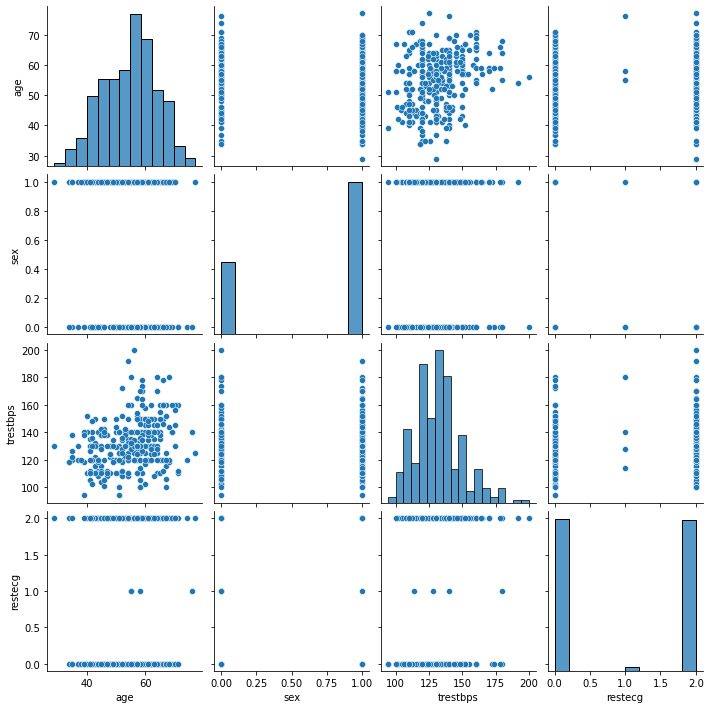

In [15]:
sns.pairplot(X)
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
def create_model(clf, X_train, X_test, y_train, y_test):
    model = clf.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    # Kiểm tra độ chính xác
    print("The R^2 train score is: ", model.score(X_train, y_train))
    print("The R^2 test score is: ", model.score(X_test,y_test))
    # tinh them mse
    print("MSE (in train): ", mean_squared_error(y_train, model.predict(X_train)))
    print("MSE (in test): ", mean_squared_error(y_test, y_pred))
    return model

# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr_model = LinearRegression()
lr_model = create_model(lr_model, X_train, X_test, y_train, y_test)

The R^2 train score is:  0.10451126883323802
The R^2 test score is:  0.060848605462235805
MSE (in train):  2545.936095240505
MSE (in test):  2102.714726142868


### Model không phù hợp

# Multivariate Polynomial Regression

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
pr2 = PolynomialFeatures(degree=2)
X_pr = pr2.fit_transform(X)

In [22]:
X_pr_train, X_pr_test, y_pr_train, y_pr_test = train_test_split(X_pr, y, random_state=42)

In [23]:
lr_model_2 = LinearRegression()
lr_model_2 = create_model(lr_model_2, X_pr_train, X_pr_test, y_pr_train, y_pr_test)

The R^2 train score is:  0.15614716549724916
The R^2 test score is:  0.08311544527026204
MSE (in train):  2399.1316871540635
MSE (in test):  2052.8603445795575


### Model không phù hợp

# Decision trees

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
decision_tree_model = DecisionTreeRegressor()
decision_tree_model = create_model(decision_tree_model, X_train, X_test, y_train, y_test)

The R^2 train score is:  0.9893537512192241
The R^2 test score is:  -1.5460068457430558
MSE (in train):  30.26801801801802
MSE (in test):  5700.386666666666


### Model không phù hợp

# Random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Create random forest resgressor object
rdf_model = RandomForestRegressor(n_estimators=100)
# Train model
rdf_model = create_model(rdf_model, X_train, X_test, y_train, y_test)

The R^2 train score is:  0.8264631297386202
The R^2 test score is:  -0.3124837393851123
MSE (in train):  493.3772659292559
MSE (in test):  2938.587859933333


### Model không phù hợp

# SVR

In [28]:
from sklearn.svm import SVR

In [29]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
svr_rbf = create_model(svr_rbf, X_train, X_test, y_train, y_test)

The R^2 train score is:  0.7019833588166919
The R^2 test score is:  -0.3094136345708196
MSE (in train):  847.2818220530211
MSE (in test):  2931.7140431649595


In [30]:
svr_lin = SVR(kernel='linear', C=100)
svr_lin = create_model(svr_lin, X_train, X_test, y_train, y_test)

The R^2 train score is:  0.08760338092387876
The R^2 test score is:  0.055219775738589494
MSE (in train):  2594.006384262045
MSE (in test):  2115.3174047096045


In [31]:
svr_poly = SVR(kernel='poly', C=100, degree=3, coef0=1)
svr_poly = create_model(svr_poly, X_train, X_test, y_train, y_test)

The R^2 train score is:  0.04798646620125857
The R^2 test score is:  0.09753247469243487
MSE (in train):  2706.6399994756803
MSE (in test):  2020.5813102837524
